In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
warnings.filterwarnings("ignore")
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

##**1 - Business Problem**

___Forecast the airlines data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting___

##**2 - Data collection and description**

In [8]:
df=pd.read_excel("/content/Airlines+Data.xlsx")

In [9]:
df1=df.copy()

In [10]:
df1.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [11]:
df1.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [12]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [13]:
df1 = df1.set_index('Month')

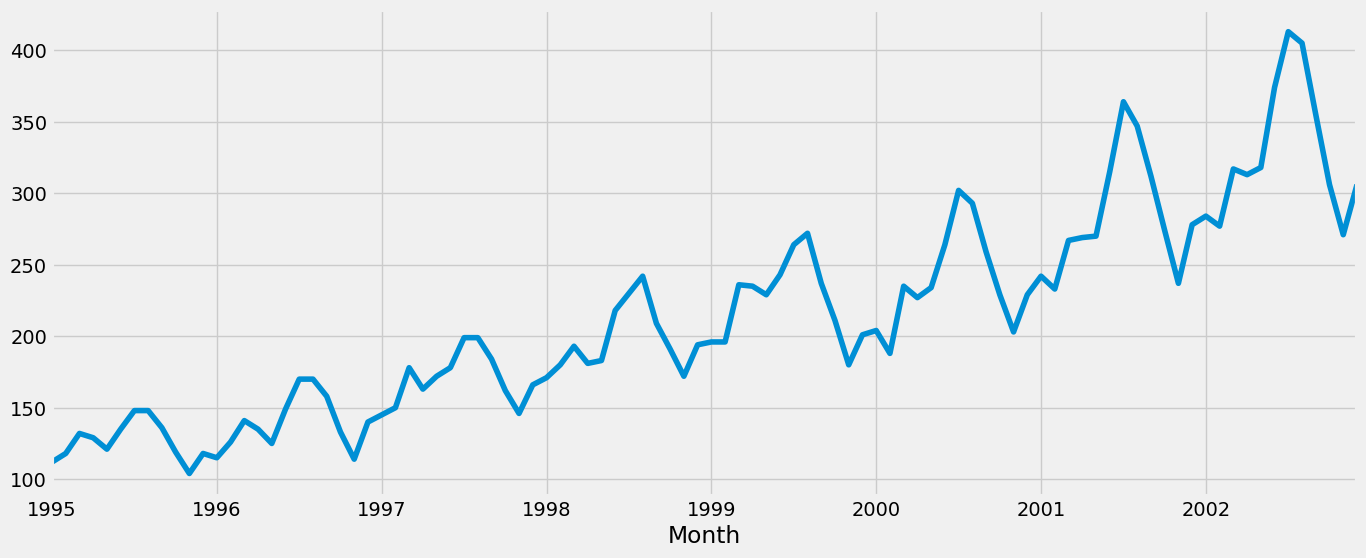

In [14]:
df1['Passengers'].plot(figsize=(15, 6))
plt.show()

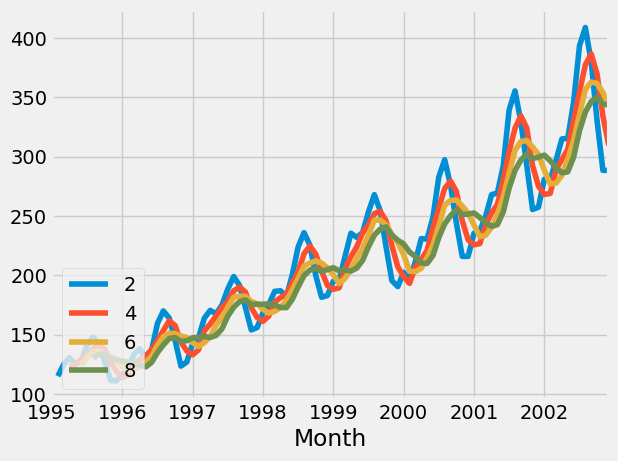

In [16]:
for i in range(2,10,2):
    df1['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

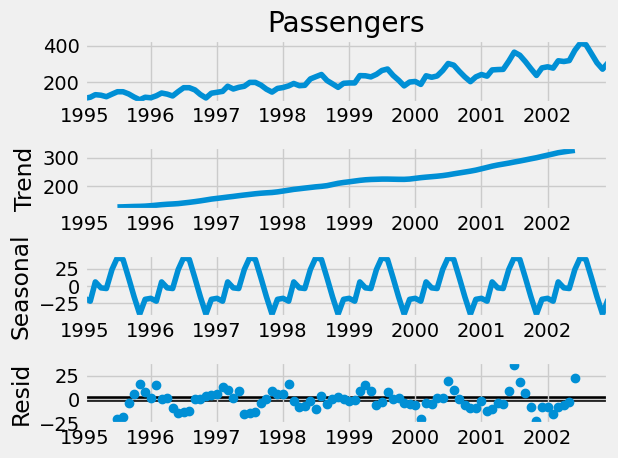

In [17]:
ts_add = seasonal_decompose(df1['Passengers'],model="additive")
fig = ts_add.plot()
plt.show()

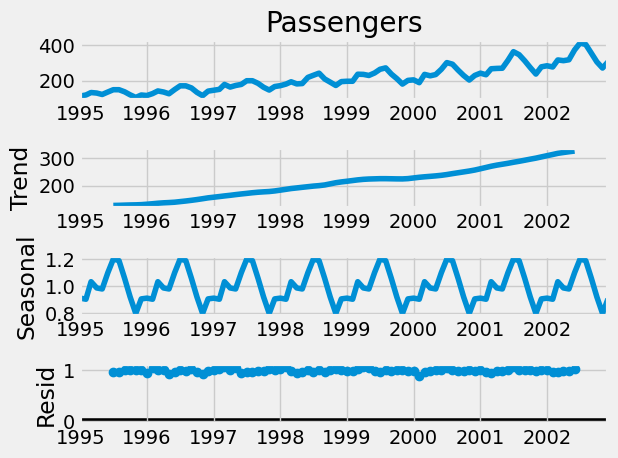

In [18]:
ts_mul = seasonal_decompose(df1.Passengers,model="multiplicative")
fig = ts_mul.plot()
plt.show()

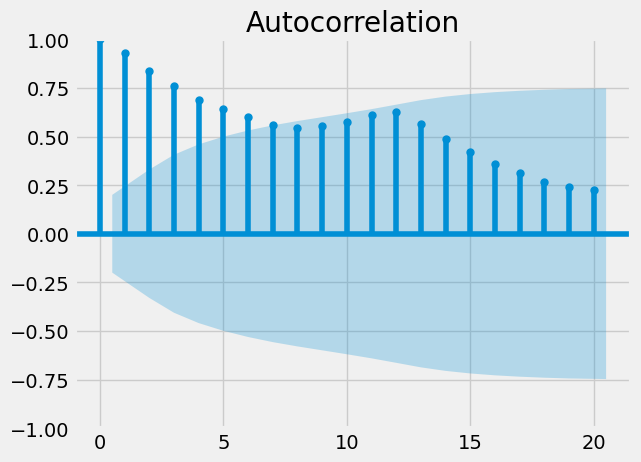

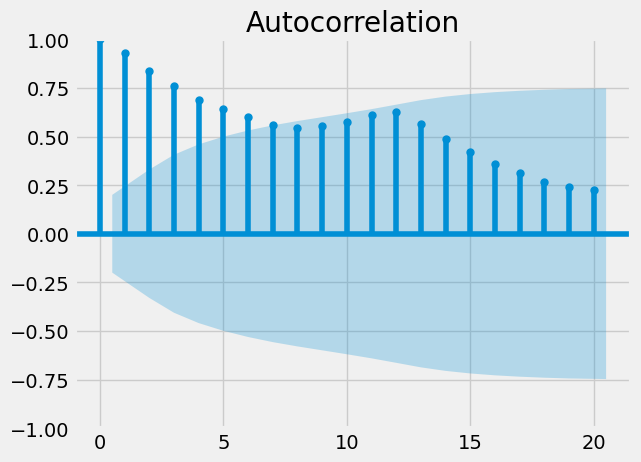

In [19]:
tsa_plots.plot_acf(df1['Passengers'])

##**3 - Building Time series forecasting with ARIMA**

In [20]:
X = df1['Passengers'].values

In [21]:
size = int(len(X) * 0.66)

In [22]:
train, test = X[0:size], X[size:len(X)]

In [23]:
import statsmodels.api as smapi

model = smapi.tsa.arima.ARIMA(train, order=(1,1,2))

model_fit = model.fit()

In [24]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   63
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -263.469
Date:                Thu, 30 Mar 2023   AIC                            534.939
Time:                        06:35:40   BIC                            543.447
Sample:                             0   HQIC                           538.279
                                 - 63                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5005      0.223      2.241      0.025       0.063       0.938
ma.L1         -0.4171      0.254     -1.645      0.100      -0.914       0.080
ma.L2         -0.3512      0.172     -2.047      0.0

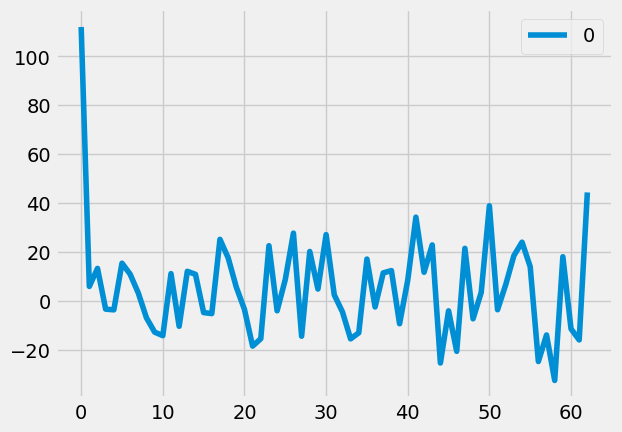

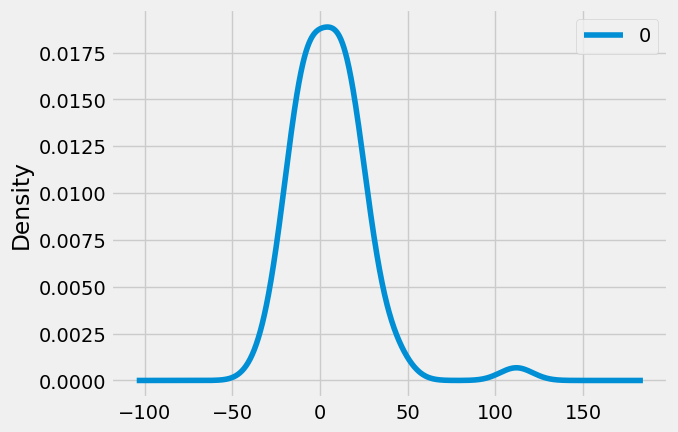

                0
count   63.000000
mean     5.522208
std     21.391490
min    -32.427950
25%     -8.244894
50%      4.921059
75%     16.339121
max    112.000000


In [25]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

##**3.1 - Rolling Forecast ARIMA Model**

In [26]:
history = [x for x in train]

In [27]:
predictions = list()

In [28]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=237.351697, expected=227.000000
predicted=218.673588, expected=234.000000
predicted=235.603571, expected=264.000000
predicted=250.751821, expected=302.000000
predicted=306.236426, expected=293.000000
predicted=283.001988, expected=259.000000
predicted=247.529991, expected=229.000000
predicted=224.116737, expected=203.000000
predicted=207.700690, expected=229.000000
predicted=249.298532, expected=242.000000
predicted=248.869263, expected=233.000000
predicted=231.312583, expected=267.000000
predicted=266.498530, expected=269.000000
predicted=259.866113, expected=270.000000
predicted=269.604000, expected=315.000000
predicted=312.657188, expected=364.000000
predicted=368.277208, expected=347.000000
predicted=332.664432, expected=312.000000
predicted=298.257405, expected=274.000000
predicted=262.776570, expected=237.000000
predicted=240.179592, expected=278.000000
predicted=308.214176, expected=284.000000
predicted=287.379158, expected=277.000000
predicted=281.188134, expected=317

In [29]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 792.015


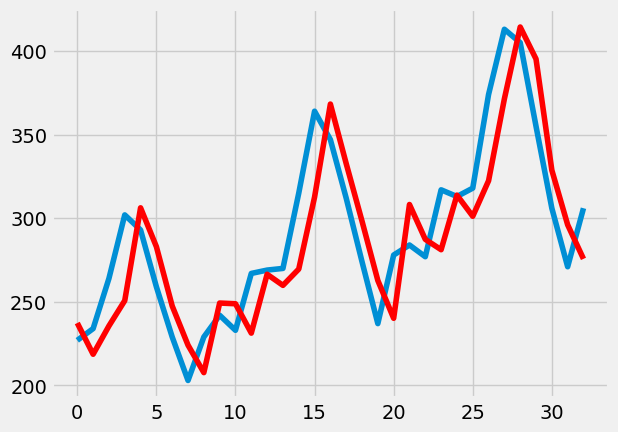

In [30]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

##A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale

##**4 - Comparing Multiple Models**

In [32]:
df2 = df.copy()
df2

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [34]:
df2['year'] = df2.Month.dt.strftime('%Y')
df2['month'] = df2.Month.dt.strftime('%b')
df2['date'] = df2.Month.dt.strftime('%d')
df2

,Month,Passengers,year,month,date
0,1995-01-01,112,1995,Jan,01
1,1995-02-01,118,1995,Feb,01
2,1995-03-01,132,1995,Mar,01
3,1995-04-01,129,1995,Apr,01
4,1995-05-01,121,1995,May,01
...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01
92,2002-09-01,355,2002,Sep,01
93,2002-10-01,306,2002,Oct,01
94,2002-11-01,271,2002,Nov,01


In [35]:
df2['t']= np.arange(0,96)
df2['t_square'] = df2['t']*df2['t']
df2['log_passanger'] = np.log(df2['Passengers'])

In [36]:
df2

,Month,Passengers,year,month,date,t,t_square,log_passanger
0,1995-01-01,112,1995,Jan,01,0,0,4.718499
1,1995-02-01,118,1995,Feb,01,1,1,4.770685
2,1995-03-01,132,1995,Mar,01,2,4,4.882802
3,1995-04-01,129,1995,Apr,01,3,9,4.859812
4,1995-05-01,121,1995,May,01,4,16,4.795791
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01,91,8281,6.003887
92,2002-09-01,355,2002,Sep,01,92,8464,5.872118
93,2002-10-01,306,2002,Oct,01,93,8649,5.723585
94,2002-11-01,271,2002,Nov,01,94,8836,5.602119


In [37]:
month_dummies = pd.get_dummies(df2['month'])
month_dummies


,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
df2_new = pd.concat([df2,month_dummies] ,axis = 1)
df2_new


,Month,Passengers,year,month,date,t,t_square,log_passanger,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995,Jan,01,0,0,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,Feb,01,1,1,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,Mar,01,2,4,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,Apr,01,3,9,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,May,01,4,16,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01,91,8281,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002,Sep,01,92,8464,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002,Oct,01,93,8649,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002,Nov,01,94,8836,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
train1, test1 = np.split(df2_new, [int(.67 *len(df2_new))])

In [42]:
linear= smf.ols('Passengers ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Passengers'])-np.array(predlin))**2))
rmselin

25.503983516483476

In [45]:
quad=smf.ols('Passengers~t+t_square',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predquad))**2))
rmsequad

53.18955514415147

In [46]:
expo=smf.ols('log_passanger~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

40.84924171132654

In [47]:
additive= smf.ols('Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predadd))**2))
rmseadd

123.94935401651406

In [51]:
addquad= smf.ols('Passengers~t+t_square+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep','t','t_square']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

34.50350403859249

In [54]:
mulsea=smf.ols('log_passanger~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

127.83693479585911

In [58]:
mullin= smf.ols('log_passanger~t+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin


12.759135120294735

In [60]:
mul_quad= smf.ols('log_passanger~t+t_square+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_square','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

28.25957879081398

##**5 - Conclusion**

In [67]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [68]:
rmse=pd.DataFrame(output)

In [69]:
print(rmse)

           Model      Values
0  rmse_mul_quad   28.259579
1        rmseadd  123.949354
2    rmseaddquad   34.503504
3       rmseexpo   40.849242
4        rmselin   25.503984
5        rmsemul  127.836935
6      rmsemulin   12.759135
7       rmsequad   53.189555


##**Multiplicative seasonality with linear trend has the best RMSE value**